In [1]:
import requests
import json
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import os
import numpy as np

In [2]:
!unzip -qq dataset.zip

replace dataset/images_0 (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [3]:
with open('annotations_new.json') as fp:
    data = json.load(fp)

In [4]:
print(json.dumps(data["images_0 (4).jpg168568"], indent=2))

{
  "filename": "images_0 (4).jpg",
  "size": 168568,
  "regions": [
    {
      "shape_attributes": {
        "name": "rect",
        "x": 94,
        "y": 59,
        "width": 85,
        "height": 50
      },
      "region_attributes": {
        "class_name": "hardhat"
      }
    },
    {
      "shape_attributes": {
        "name": "rect",
        "x": 236,
        "y": 63,
        "width": 86,
        "height": 48
      },
      "region_attributes": {
        "class_name": "hardhat"
      }
    },
    {
      "shape_attributes": {
        "name": "rect",
        "x": 339,
        "y": 74,
        "width": 77,
        "height": 42
      },
      "region_attributes": {
        "class_name": "hardhat"
      }
    },
    {
      "shape_attributes": {
        "name": "rect",
        "x": 423,
        "y": 67,
        "width": 76,
        "height": 44
      },
      "region_attributes": {
        "class_name": "hardhat"
      }
    },
    {
      "shape_attributes": {
        "name": "r

In [5]:
DATA_DIR = "dataset"

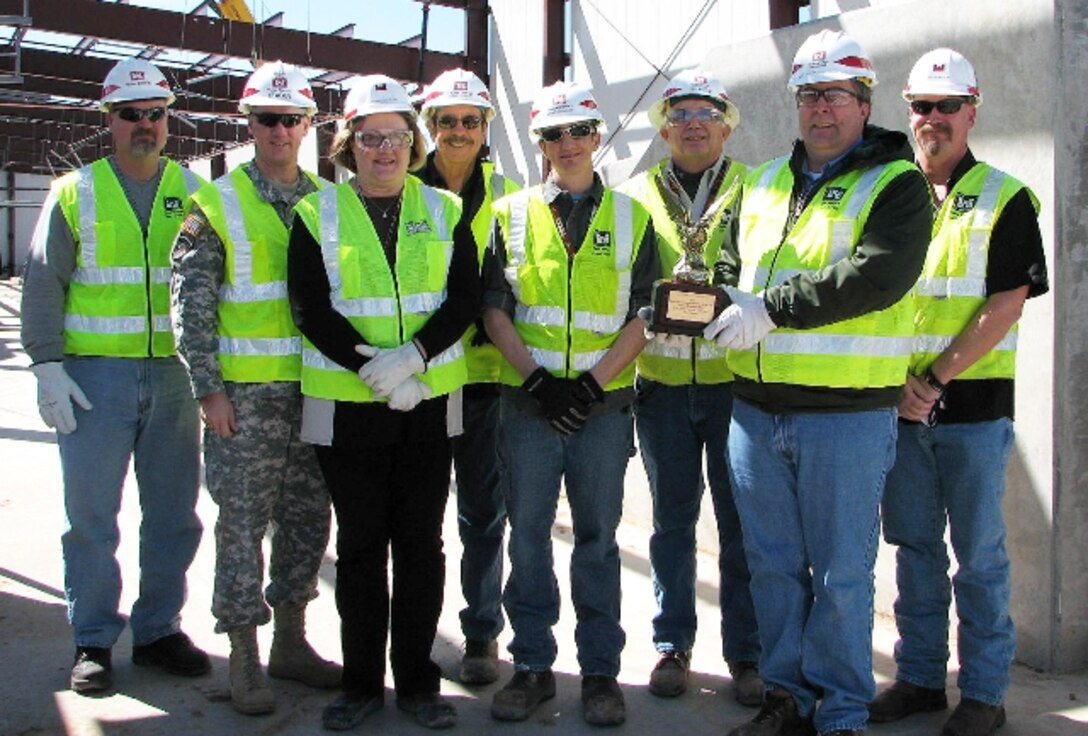

In [6]:
Image.open(os.path.join(DATA_DIR, data["images_0 (4).jpg168568"]["filename"]))

In [7]:
def get_bbox(img_annot):
    bboxes = []
    for bbox in img_annot["regions"]:
        shape_attrs = bbox["shape_attributes"]
        x = shape_attrs["x"]
        y = shape_attrs["y"]
        width = shape_attrs["width"]
        height = shape_attrs["height"]

        bboxes.append((x, y, width, height))

    return bboxes

### Checking the annotations

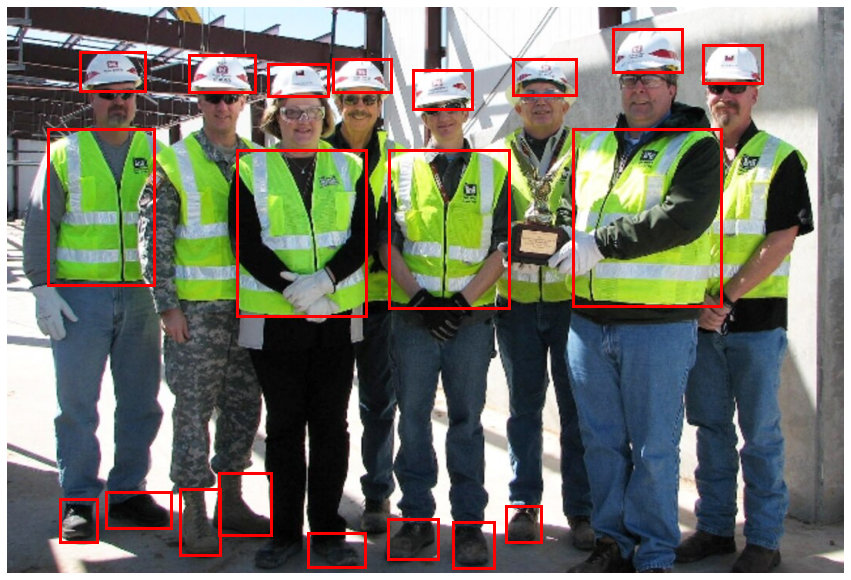

In [8]:
im = np.array(Image.open(os.path.join(DATA_DIR, data["images_0 (4).jpg168568"]["filename"])))
bboxes = get_bbox(data["images_0 (4).jpg168568"])

# Create figure and axes
fig,ax = plt.subplots(1, figsize=(15,15))

# Display the image
ax.imshow(im)

for bbox in bboxes:
    x, y, width, height = bbox
    # Create a Rectangle patch
    rect = patches.Rectangle((x,y),width,height,linewidth=3,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
plt.axis('off')
plt.show()

In [9]:
def get_bboxratio(img_annot):
    ratios = []
    img_width, img_height = Image.open(os.path.join(DATA_DIR, img_annot["filename"])).size
    for bbox in get_bbox(img_annot):
        x, y, width, height = bbox
        ratios.append([width/img_width, height/img_height])
    return ratios

In [10]:
bbratio = []
for img_annot in data.values():
    bbratio.extend(get_bboxratio(img_annot))

In [11]:
bbratio = np.array(bbratio)

### Plotting the Bounding Box Aspect ratio's

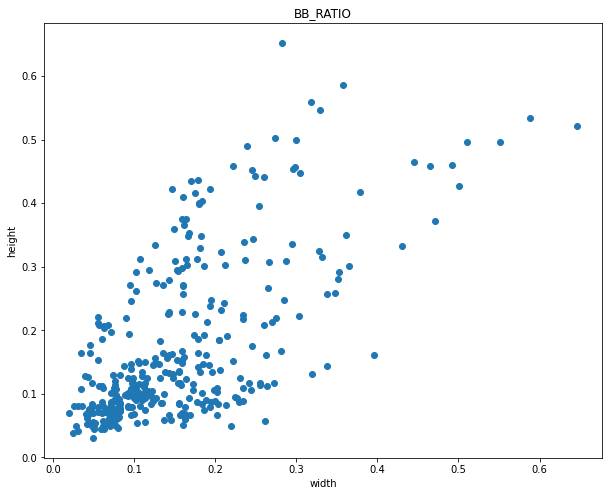

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(bbratio[:,0], bbratio[:,1], cmap="tab10")
plt.xlabel('width')
plt.ylabel('height')
plt.title('BB_RATIO')
plt.show()

### Determine the Ideal Number of clusters using Elbow Method

In [13]:
from sklearn.cluster import KMeans

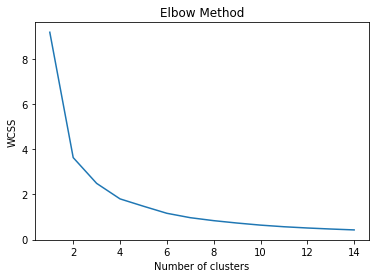

In [14]:
wcss = []
for c in range(1, 15):
    kmeans = KMeans(n_clusters=c, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(bbratio)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Cluster the Bounding boxes to get ideal numbers to fit all

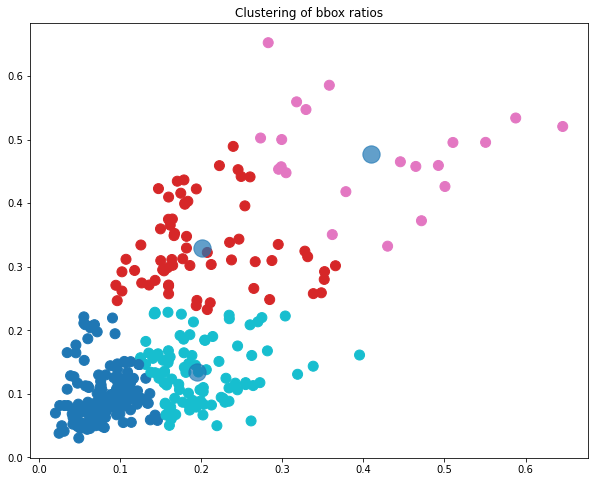

In [15]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(bbratio)
plt.figure(figsize=(10,8))
plt.scatter(bbratio[:,0], bbratio[:,1], c=pred_y, cmap="tab10", s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, alpha=.7)
plt.title('Clustering of bbox ratios')
plt.show()